In [102]:
pip install requests matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import requests

In [42]:
def getPeriodsByYear(year):
    url = "https://www.glo.or.th/api/lottery/getPeriodsByYear"
    payload = {"type": "CHECKED", "year": str(year)}
    try:
        res = requests.post(url, payload)
        res = res.json()
        if (res["statusCode"] == 200):
            return res["response"]["result"]
        return None

    except Exception as e:
        print(f"Error: {e}")

In [44]:
p_year = getPeriodsByYear("2024")
p_year

[{'date': '2024-12-16', 'no': 48},
 {'date': '2024-12-16', 'no': 47},
 {'date': '2024-12-01', 'no': 46},
 {'date': '2024-12-01', 'no': 45},
 {'date': '2024-11-16', 'no': 43},
 {'date': '2024-11-16', 'no': 44},
 {'date': '2024-11-01', 'no': 42},
 {'date': '2024-11-01', 'no': 41},
 {'date': '2024-10-16', 'no': 40},
 {'date': '2024-10-16', 'no': 39},
 {'date': '2024-10-01', 'no': 38},
 {'date': '2024-10-01', 'no': 37},
 {'date': '2024-09-16', 'no': 36},
 {'date': '2024-09-16', 'no': 35},
 {'date': '2024-09-01', 'no': 33},
 {'date': '2024-09-01', 'no': 34},
 {'date': '2024-08-16', 'no': 32},
 {'date': '2024-08-16', 'no': 31},
 {'date': '2024-08-01', 'no': 29},
 {'date': '2024-08-01', 'no': 30},
 {'date': '2024-07-16', 'no': 27},
 {'date': '2024-07-16', 'no': 28},
 {'date': '2024-07-01', 'no': 26},
 {'date': '2024-07-01', 'no': 25},
 {'date': '2024-06-16', 'no': 24},
 {'date': '2024-06-16', 'no': 23},
 {'date': '2024-06-01', 'no': 22},
 {'date': '2024-06-01', 'no': 21},
 {'date': '2024-05-1

In [49]:
def removeDuplicatePeriods(data_api):
    result = []
    for e in data_api:
        result.append(e["date"])
    return list(dict.fromkeys(result))

In [45]:
removeDuplicatePeriods(p_year)

['2024-12-16',
 '2024-12-01',
 '2024-11-16',
 '2024-11-01',
 '2024-10-16',
 '2024-10-01',
 '2024-09-16',
 '2024-09-01',
 '2024-08-16',
 '2024-08-01',
 '2024-07-16',
 '2024-07-01',
 '2024-06-16',
 '2024-06-01',
 '2024-05-16',
 '2024-05-02',
 '2024-04-16',
 '2024-04-01',
 '2024-03-16',
 '2024-03-01',
 '2024-02-16',
 '2024-02-01',
 '2024-01-17']

In [55]:
def getLotteryResult(date, month, year):
    url = "https://www.glo.or.th/api/checking/getLotteryResult"
    payload = {"date": str(date), "month": str(month), "year": str(year)}
    try:
        res = requests.post(url, payload)
        res = res.json()
        if (res["statusCode"] == 200):
            return res["response"]["result"]["data"]
        return None
    
    except Exception as e:
        print(f"Error: {e}")

In [56]:
data_api = getLotteryResult("01", "02", "2024")
data_api

{'first': {'price': '6000000.00', 'number': [{'round': 1, 'value': '607063'}]},
 'second': {'price': '200000.00',
  'number': [{'round': 2, 'value': '166521'},
   {'round': 4, 'value': '376456'},
   {'round': 1, 'value': '779424'},
   {'round': 3, 'value': '808878'},
   {'round': 5, 'value': '851911'}]},
 'third': {'price': '80000.00',
  'number': [{'round': 2, 'value': '053669'},
   {'round': 3, 'value': '087418'},
   {'round': 8, 'value': '113069'},
   {'round': 5, 'value': '516593'},
   {'round': 9, 'value': '535443'},
   {'round': 1, 'value': '545456'},
   {'round': 7, 'value': '678876'},
   {'round': 6, 'value': '697943'},
   {'round': 10, 'value': '772652'},
   {'round': 4, 'value': '831569'}]},
 'fourth': {'price': '40000.00',
  'number': [{'round': 44, 'value': '011437'},
   {'round': 12, 'value': '030830'},
   {'round': 14, 'value': '037206'},
   {'round': 8, 'value': '058236'},
   {'round': 29, 'value': '068121'},
   {'round': 34, 'value': '090487'},
   {'round': 31, 'value':

In [128]:
import time

def groupPrizesByYear(start_year, end_year, month, date):  
    result = {
        "first": [],
        "second": [],
        "third": [],
        "fourth": [],
        "fifth": [],
        "last2": [],
        "last3f": [],
        "last3b": [],
        "near1": []
    }
    for year in range(int(start_year), int(end_year) + 1):
        # periods = getPeriodsByYear(y)
        # periods = removeDuplicatePeriods(periods)
        print(f"year: {year}")    
        # [year, month, date] = period.split("-")
        data_api = getLotteryResult(date, month, year)
        for key, value in data_api.items():
            for number in value["number"]:
                result[key].append(int(number["value"]))
        time.sleep(5)
    return result

In [129]:
data = groupPrizesByYear("2015", "2024", "02", "01")
data

year: 2015
year: 2016
year: 2017
year: 2018
year: 2019
year: 2020
year: 2021
year: 2022
year: 2023
year: 2024


{'first': [155537,
  927800,
  54672,
  26853,
  967134,
  589227,
  912307,
  944308,
  297411,
  607063],
 'second': [29158,
  275175,
  349398,
  390416,
  973598,
  421977,
  513583,
  669966,
  877415,
  977144,
  1024,
  99921,
  201426,
  261877,
  856652,
  176248,
  625633,
  669525,
  713539,
  958517,
  28581,
  206508,
  437256,
  730956,
  907234,
  41656,
  102110,
  574473,
  679758,
  912367,
  332913,
  742193,
  832004,
  911667,
  977731,
  419058,
  444350,
  480963,
  764589,
  794196,
  229120,
  589702,
  670839,
  677223,
  679028,
  166521,
  376456,
  779424,
  808878,
  851911],
 'third': [166630,
  223822,
  287595,
  389944,
  456144,
  526312,
  702469,
  721265,
  861653,
  935825,
  327079,
  355179,
  387830,
  470389,
  480226,
  539207,
  610214,
  700211,
  803320,
  979451,
  49209,
  218194,
  242207,
  247481,
  350633,
  602819,
  604264,
  828244,
  830032,
  999774,
  83574,
  116158,
  209320,
  252942,
  637456,
  665506,
  740707,
  850651,


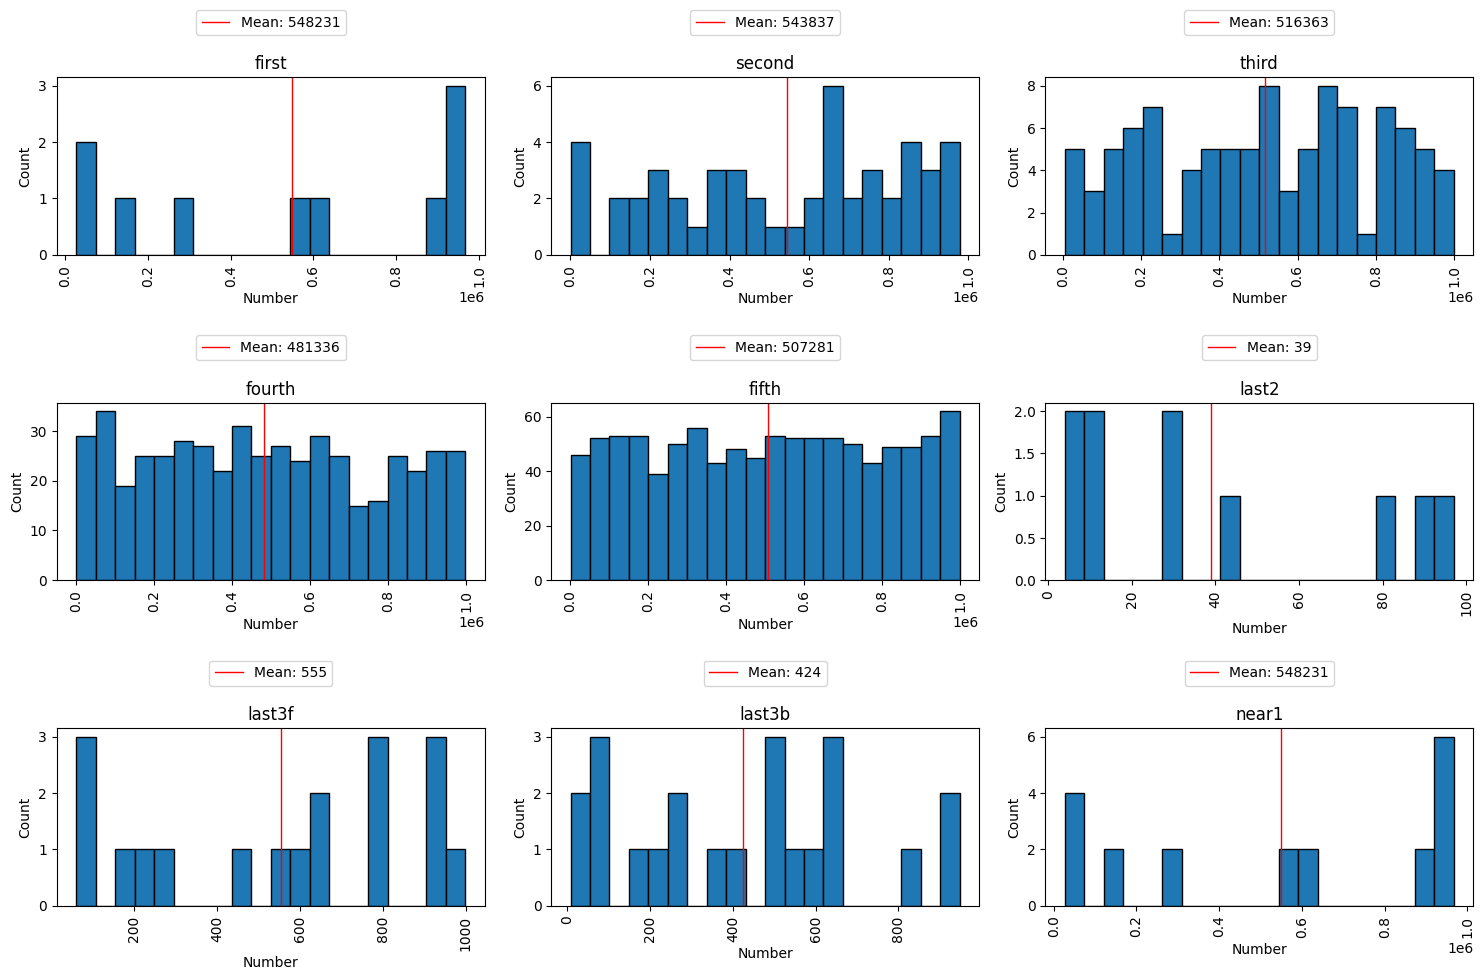

In [182]:
import matplotlib.pyplot as plt
import numpy as np

f,ax = plt.subplots(3,3, figsize=(15, 10))
ax = ax.ravel()
for idx, (key, values) in enumerate(data.items()):
    mean = int(np.mean(values))
    std = int(np.std(values))
    ax[idx].axvline(x=mean, linewidth=1, color='r', label=f'Mean: {mean}')
    ax[idx].tick_params(axis='x', rotation=90)
    # The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 
    ax[idx].hist(values, edgecolor='black', bins=20)
    ax[idx].set_title(f"{key}")
    ax[idx].set_xlabel("Number")
    ax[idx].set_ylabel("Count")
    ax[idx].legend(loc='lower center', bbox_to_anchor=(0.5, 1.2), ncol=1)

plt.tight_layout()